In [34]:
import pandas as pd

df_superficie = pd.read_csv("house_market/superficie.csv", header=None)
df_house_price = pd.read_csv("house_market/house_price.csv", index_col=0)
df_nombre_de_sdb = pd.read_csv("house_market/nombre_de_sdb.csv", header=None)
df_nombres_de_chambres = pd.read_csv("house_market/nombre_de_chambres.csv", header=None)

In [ ]:
df_superficie.columns = ['id','surface']
df_nombre_de_sdb.columns = ['id','bathrooms']
df_nombres_de_chambres.columns = ['id','rooms']

In [27]:
df_house_price.head()

,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


In [36]:
df_nombres_de_chambres.head()

,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


In [37]:
df_nombre_de_sdb.head()

,id,bathrooms
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [38]:
df_superficie.head()

,id,surface
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [39]:
dataset = df_superficie.merge(df_nombre_de_sdb).merge(df_nombres_de_chambres).merge(df_house_price)

In [41]:
dataset.head()

,id,surface,bathrooms,rooms,house_price
0,0,28844,2,1,1421908.0
1,1,27667,1,4,1305091.0
2,2,14742,1,1,164373.0
3,3,28089,3,4,1441714.0
4,4,11713,1,2,108290.0


In [42]:
dataset["surface"].mean()

20439.77

In [45]:
print("The average number of rooms is {} and the median number is {}".format(dataset["rooms"].mean(),dataset["rooms"].median()))

The average number of rooms is 2.42 and the median number is 2.0


In [46]:
dataset["house_price"].mean()

767747.87

In [58]:
dataset.groupby("rooms")["house_price"].mean()

rooms
1    980774.869565
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

In [59]:
def home_size(x):
    if x > 25000:
        return "very large"
    elif x > 20000:
        return "large"
    elif x > 15000:
        return "medium"
    elif x > 10000:
        return "small"
    else:
        return "very small"

In [60]:
dataset["home_size"] = dataset["surface"].apply(lambda x : home_size(x))

In [61]:
display(dataset)

,id,surface,bathrooms,rooms,house_price,home_size
0,0,28844,2,1,1421908.0,very large
1,1,27667,1,4,1305091.0,very large
2,2,14742,1,1,164373.0,small
3,3,28089,3,4,1441714.0,very large
4,4,11713,1,2,108290.0,small
...,...,...,...,...,...,...
95,95,11417,3,3,132599.0,small
96,96,12126,1,2,155828.0,small
97,97,16390,1,2,237061.0,medium
98,98,23738,1,2,976422.0,large


In [64]:
dataset.groupby("home_size")["house_price"].mean("house_price")

home_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.552456e+06
Name: house_price, dtype: float64

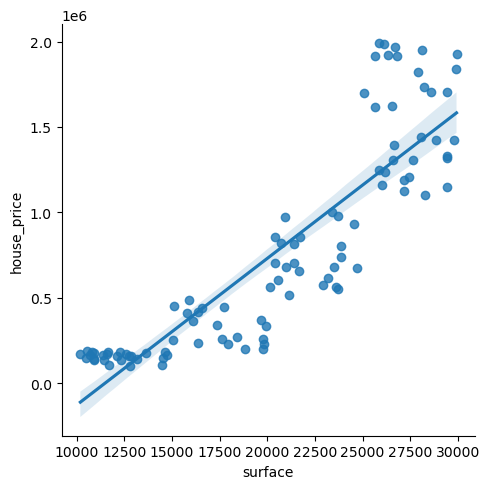

In [67]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "surface", y="house_price", data = dataset)